**Importing Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb  
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import mlflow

In [2]:
# data loading

employee_data = pd.read_csv("employee-attrition.csv")
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Data Cleaning & Preprocessing**

In [3]:
employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
# data preprocessing

employee_data = employee_data.drop(['EmployeeCount', 'StandardHours'], axis=1)
X = employee_data.drop(['Attrition', 'BusinessTravel', 'EducationField', 'OverTime'], axis=1)
y = employee_data['Attrition']

# label encoding - categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

**Data Analysis**

In [5]:
employee_data.shape

(1470, 33)

In [6]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [8]:
employee_data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
# encode the attrition (to use it for EDA)

employee_data['Attrition'] = employee_data['Attrition'].factorize(['No','Yes'])[0]
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


*Attrition: No = 0    Yes = 1*

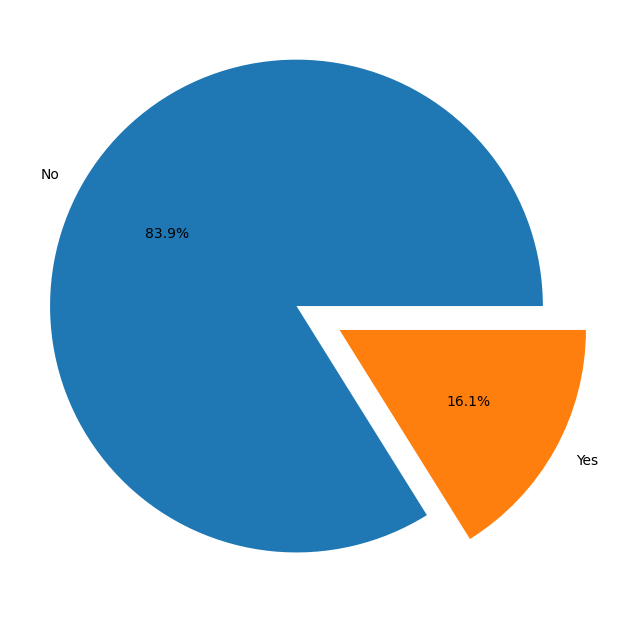

In [10]:
plt.figure(figsize=(8,8))
pie = employee_data.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

<Axes: >

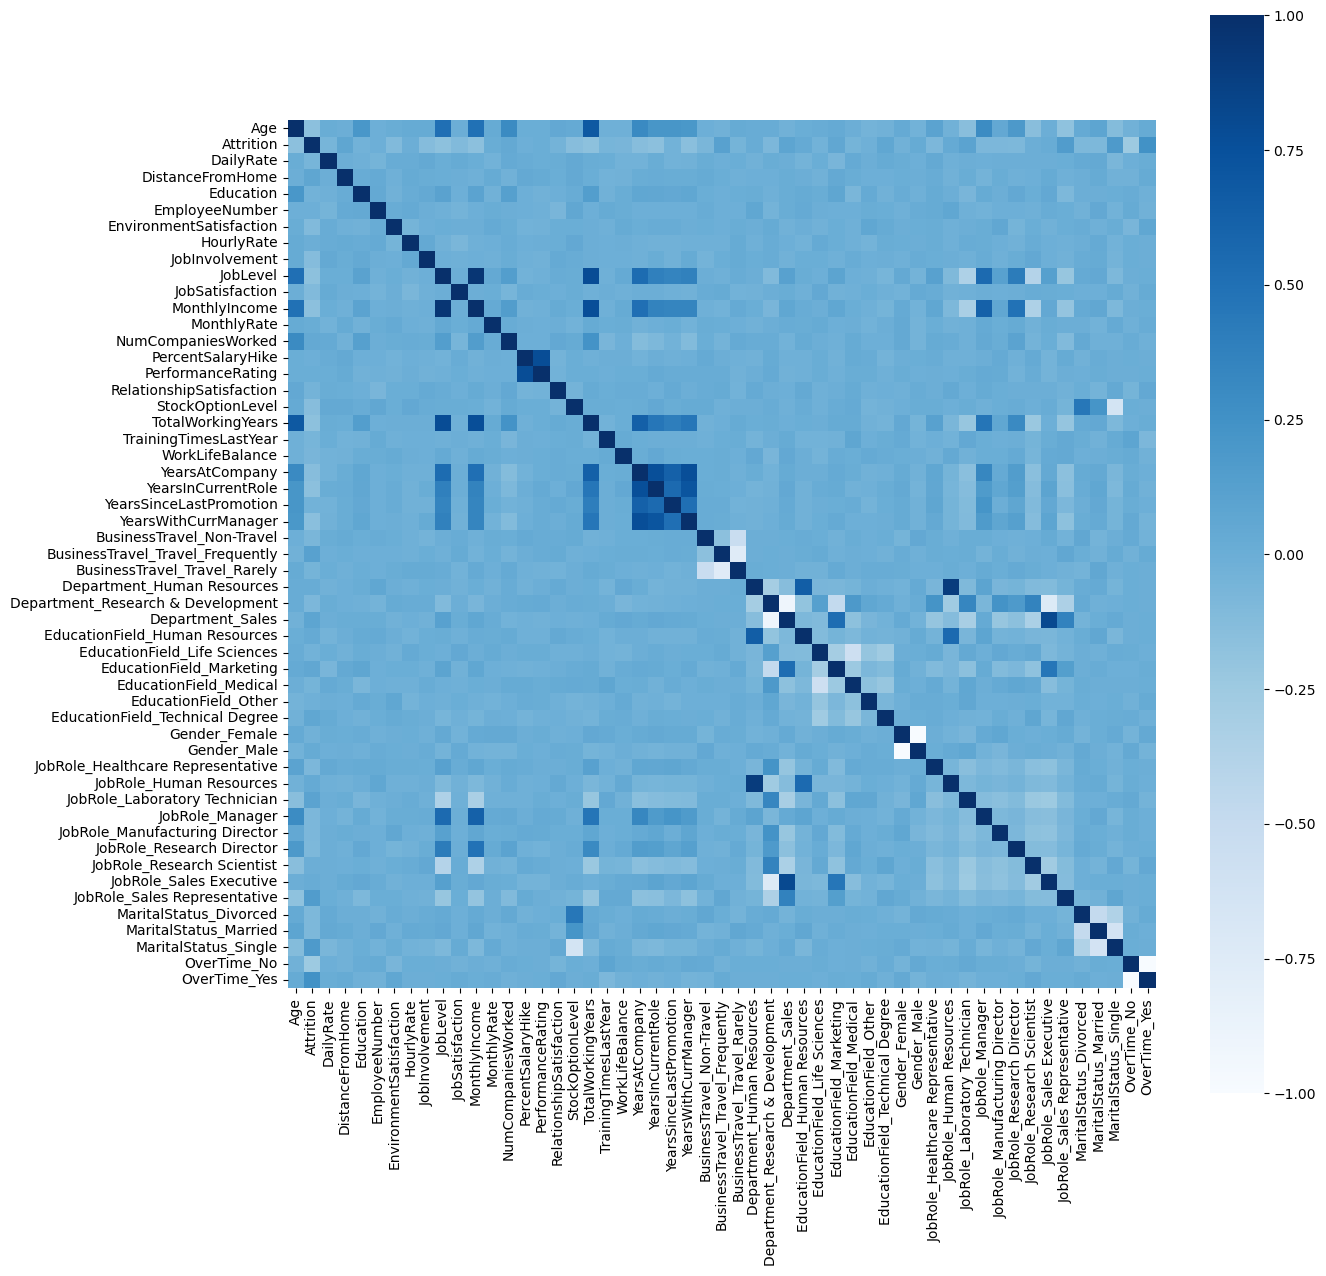

In [15]:
# one-hot encode categorical variables
employee_data_encoded = pd.get_dummies(employee_data)

# dropping constant columns if any
employee_data_encoded = employee_data_encoded.loc[:, employee_data_encoded.apply(pd.Series.nunique) != 1]

# correlation
corr = employee_data_encoded.corr()

# heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=True, square=True, annot=False, cmap='Blues')


**Splitting Data**

In [26]:
# separating the features from the target 
X = employee_data.drop(['Attrition','BusinessTravel','EducationField','OverTime'],axis=1) # features
y = employee_data['Attrition'] # target

In [27]:
# label encoding the categorical variables

X['Department'] = preprocessing.LabelEncoder().fit_transform(X['Department'])
X['Education'] = preprocessing.LabelEncoder().fit_transform(X['Education'])
X['JobRole'] = preprocessing.LabelEncoder().fit_transform(X['JobRole'])
X['Gender'] = preprocessing.LabelEncoder().fit_transform(X['Gender'])
X['MaritalStatus'] = preprocessing.LabelEncoder().fit_transform(X['MaritalStatus'])
X['Over18'] = preprocessing.LabelEncoder().fit_transform(X['Over18'])

In [28]:
# standardization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# splitting data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow
mlflow.set_tracking_uri("http://localhost:8080")  # MLflow server address and port
mlflow.set_experiment("employee_attrition_experiment")  # experiment name


<Experiment: artifact_location='mlflow-artifacts:/879356559602350210', creation_time=1715376747622, experiment_id='879356559602350210', last_update_time=1715376747622, lifecycle_stage='active', name='employee_attrition_experiment', tags={}>

In [29]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 29)
(1176, 29)
(294, 29)


**Model Building**

In [32]:
models = [
    ("Random Forest (estimators=100)", RandomForestClassifier(n_estimators=100)),
    ("Random Forest (estimators=500)", RandomForestClassifier(n_estimators=500)),
    ("Random Forest (max_depth=5)", RandomForestClassifier(max_depth=5)),
    ("Random Forest (max_depth=10)", RandomForestClassifier(max_depth=10)),
    ("Logistic Regression (C=1)", LogisticRegression(solver='liblinear', C=1)),
    ("Logistic Regression (C=0.1)", LogisticRegression(solver='liblinear', C=0.1)),
    ("Logistic Regression (C=0.01)", LogisticRegression(solver='liblinear', C=0.01)),
    ("SVM (linear)", svm.SVC(kernel='linear')),
    ("SVM (rbf)", svm.SVC(kernel='rbf')),
    ("SVM (poly)", svm.SVC(kernel='poly')),
    ("XGBoost (default)", xgb.XGBClassifier()),
    ("XGBoost (max_depth=3, n_estimators=100)", xgb.XGBClassifier(max_depth=3, n_estimators=100)),
    ("XGBoost (max_depth=5, n_estimators=100)", xgb.XGBClassifier(max_depth=5, n_estimators=100)),
    ("XGBoost (max_depth=3, n_estimators=500)", xgb.XGBClassifier(max_depth=3, n_estimators=500)),
    ("XGBoost (max_depth=5, n_estimators=500)", xgb.XGBClassifier(max_depth=5, n_estimators=500))
]

n_folds = 5
results = []

# training
for name, model in models:
    with mlflow.start_run(run_name=name):  # starting a run
        kfold = model_selection.KFold(n_splits=n_folds)
        print("Testing model:", name)

        # cross validation 
        cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted",
                                                      verbose=0, n_jobs=-1)

        # fitting the Model
        model.fit(X_train, y_train)

        # predictions and accuracy
        train_pred = model.predict(X_train)
        Training_score = accuracy_score(train_pred, y_train)
        test_pred = model.predict(X_test)
        Test_score = accuracy_score(test_pred, y_test)

        results.append(cv_results)

        # log experiments
        mlflow.log_param("model_name", name)
        mlflow.log_metric("cross_val_mean", cv_results.mean())
        mlflow.log_metric("training_accuracy", Training_score)
        mlflow.log_metric("testing_accuracy", Test_score)

        msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
        print(msg + "\n")

    mlflow.end_run()  # end run


Testing model: Random Forest (estimators=100)
Cross_Val Mean: 0.7948586089918506, Training Accuracy: 1.0, Testing Accuracy: 0.8741496598639455

Testing model: Random Forest (estimators=500)
Cross_Val Mean: 0.7961588697377481, Training Accuracy: 1.0, Testing Accuracy: 0.8741496598639455

Testing model: Random Forest (max_depth=5)
Cross_Val Mean: 0.7864169193431658, Training Accuracy: 0.8596938775510204, Testing Accuracy: 0.8673469387755102

Testing model: Random Forest (max_depth=10)
Cross_Val Mean: 0.7901547294284683, Training Accuracy: 0.9719387755102041, Testing Accuracy: 0.8707482993197279

Testing model: Logistic Regression (C=1)
Cross_Val Mean: 0.8088969025413748, Training Accuracy: 0.8528911564625851, Testing Accuracy: 0.8877551020408163

Testing model: Logistic Regression (C=0.1)
Cross_Val Mean: 0.8078334845487767, Training Accuracy: 0.8528911564625851, Testing Accuracy: 0.8843537414965986

Testing model: Logistic Regression (C=0.01)
Cross_Val Mean: 0.7888925745428972, Training 